In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_index=pd.read_csv('economic_index.csv')

In [4]:
df_index.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2021,4,3.63,3.84,1375
1,2018,2,1.79,8.78,1318
2,2022,6,1.52,7.22,1369
3,2019,6,2.98,6.82,1283
4,2021,10,3.74,5.40,1310


In [5]:
#Drop unnecessary column
df_index.drop(columns=["year","month"],axis=1,inplace=True)

In [6]:
df_index

,interest_rate,unemployment_rate,index_price
0,3.63,3.84,1375
1,1.79,8.78,1318
2,1.52,7.22,1369
3,2.98,6.82,1283
4,3.74,5.40,1310
5,2.40,5.13,1375
6,4.91,5.92,1257
7,3.58,7.77,1297
8,2.66,9.13,1262
9,2.26,6.57,1306


In [7]:
#check null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

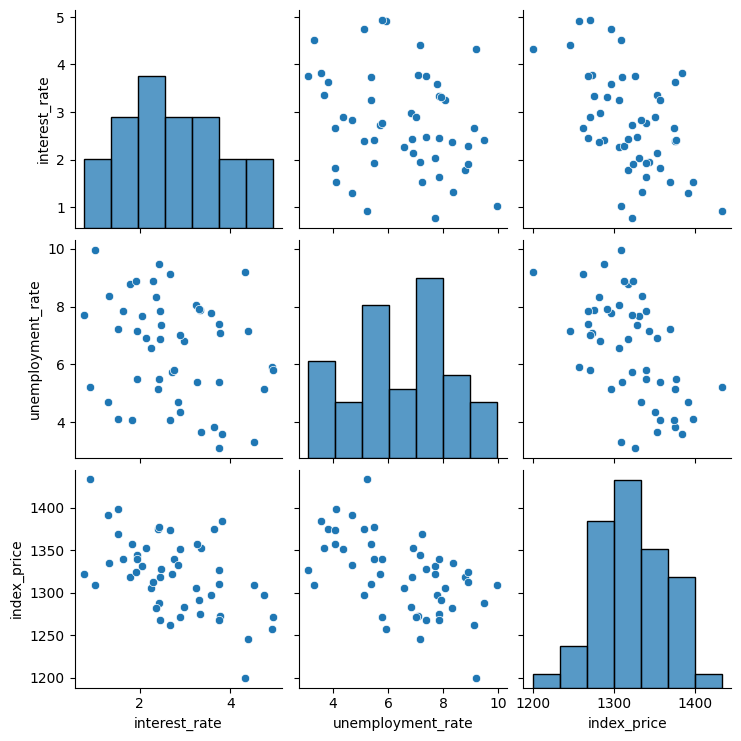

In [8]:
# lets do some visulaization
import seaborn as sns
sns.pairplot(df_index)

In [9]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.260291,-0.528676
unemployment_rate,-0.260291,1.000000,-0.551465
index_price,-0.528676,-0.551465,1.000000


In [10]:
## Independent and dependent feature
X=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]


In [11]:
X.head()

,interest_rate,unemployment_rate
0,3.63,3.84
1,1.79,8.78
2,1.52,7.22
3,2.98,6.82
4,3.74,5.40


In [12]:
y.head()

0    1375
1    1318
2    1369
3    1283
4    1310
Name: index_price, dtype: int64

In [13]:
# Train test Spilt
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [15]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [16]:
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr.fit(X_train,y_train)


LinearRegression()

In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(
    mlr,
    X_train,
    y_train,
    scoring='neg_mean_squared_error',
    cv=3)

In [20]:
np.mean(validation_score)

-641.3337182000022

In [21]:
# prediction
y_pred=mlr.predict(X_test)

In [22]:
print("Coefficient or slope:",mlr.coef_)
print("Intercept:",mlr.intercept_)

Coefficient or slope: [-30.0816441  -35.30281146]
Intercept: 1315.054054054054


In [24]:
# Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [25]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

420.7891672462164
16.923705506401383
20.513146205451186


In [26]:
# R2 Score
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.7120566495339087


In [27]:
AdjustedR2=1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(AdjustedR2)

0.6544679794406905


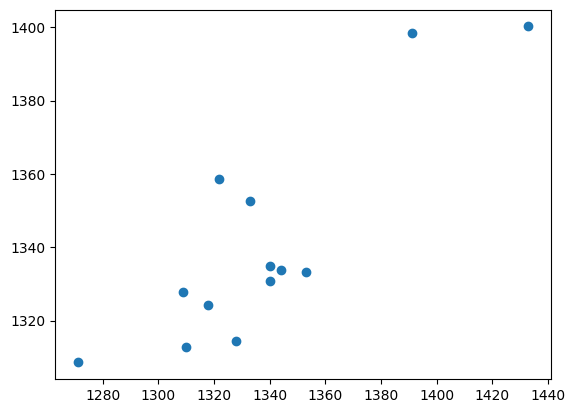

In [28]:
#Assumptions
plt.scatter(y_test,y_pred)

In [29]:
residuals=y_test-y_pred
residuals

13   -36.687951
39     5.150551
30    32.804457
45     9.115112
17    -7.421725
48   -19.645740
26    19.757007
25    10.167793
32    -6.381293
19   -37.600324
12    13.500113
4     -2.829225
37   -18.946880
Name: index_price, dtype: float64

In [30]:
#OLS Multiple Linear regression
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()


In [31]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.056
Method:                 Least Squares   F-statistic:                            0.01628
Date:                Fri, 18 Apr 2025   Prob (F-statistic):                       0.984
Time:                        17:57:14   Log-Likelihood:                         -318.23
No. Observations:                  37   AIC:                                      640.5
Df Residuals:                      35   BIC:                                      643.7
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------